# Notes in Chapter 5

1.  in order to choose the right size for a neural network model in terms of parameters, the process is based on two steps: increase the size until it fits, and then scale it down until it stops overfitting.

## 5.2

In [5]:
import torch

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).float()
t_u = torch.tensor(t_u).float()

## 5.3

In [6]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [7]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [8]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

In [9]:
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - 
    loss_fn(model(t_u, w - delta, b), t_c)) / (2 * delta)
loss_rate_of_change_w

tensor(4517.2979)

In [10]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w
w

tensor(-44.1730)

In [11]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - 
    loss_fn(model(t_u, w, b - delta), t_c)) / (2 * delta)
loss_rate_of_change_b

tensor(-4602.5000)

In [12]:
b = b - learning_rate * loss_rate_of_change_b
b

tensor(46.0250)

In [13]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [14]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [15]:
def train_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        w, b = params

        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params -= learning_rate * grad

        print('Epoch: {}, Loss: {:.2f}'.format(epoch, loss.item()))
        print('\tParams: ', params)
        print('\tGrad: ', grad)

    return params 

In [16]:
train_loop(
    n_epochs=100,
    learning_rate=1e-4,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_u,
    t_c=t_c
)

Epoch: 1, Loss: 1763.88
	Params:  tensor([ 0.5483, -0.0083])
	Grad:  tensor([4517.2969,   82.6000])
Epoch: 2, Loss: 323.09
	Params:  tensor([ 0.3623, -0.0118])
	Grad:  tensor([1859.5493,   35.7843])
Epoch: 3, Loss: 78.93
	Params:  tensor([ 0.2858, -0.0135])
	Grad:  tensor([765.4667,  16.5122])
Epoch: 4, Loss: 37.55
	Params:  tensor([ 0.2543, -0.0143])
	Grad:  tensor([315.0790,   8.5787])
Epoch: 5, Loss: 30.54
	Params:  tensor([ 0.2413, -0.0149])
	Grad:  tensor([129.6733,   5.3127])
Epoch: 6, Loss: 29.35
	Params:  tensor([ 0.2360, -0.0153])
	Grad:  tensor([53.3495,  3.9682])
Epoch: 7, Loss: 29.15
	Params:  tensor([ 0.2338, -0.0156])
	Grad:  tensor([21.9303,  3.4148])
Epoch: 8, Loss: 29.11
	Params:  tensor([ 0.2329, -0.0159])
	Grad:  tensor([8.9964, 3.1869])
Epoch: 9, Loss: 29.11
	Params:  tensor([ 0.2325, -0.0162])
	Grad:  tensor([3.6721, 3.0930])
Epoch: 10, Loss: 29.11
	Params:  tensor([ 0.2324, -0.0166])
	Grad:  tensor([1.4803, 3.0544])
Epoch: 11, Loss: 29.10
	Params:  tensor([ 0.2323

tensor([ 0.2327, -0.0438])

In [17]:
t_un = 0.1 * t_u

params = train_loop(
    n_epochs=1000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_un,
    t_c=t_c
)

.1366,  0.7733])
Epoch: 795, Loss: 4.74
	Params:  tensor([  4.5663, -12.7680])
	Grad:  tensor([-0.1364,  0.7720])
Epoch: 796, Loss: 4.73
	Params:  tensor([  4.5677, -12.7758])
	Grad:  tensor([-0.1361,  0.7707])
Epoch: 797, Loss: 4.72
	Params:  tensor([  4.5690, -12.7834])
	Grad:  tensor([-0.1359,  0.7694])
Epoch: 798, Loss: 4.72
	Params:  tensor([  4.5704, -12.7911])
	Grad:  tensor([-0.1357,  0.7681])
Epoch: 799, Loss: 4.71
	Params:  tensor([  4.5717, -12.7988])
	Grad:  tensor([-0.1354,  0.7668])
Epoch: 800, Loss: 4.71
	Params:  tensor([  4.5731, -12.8064])
	Grad:  tensor([-0.1352,  0.7655])
Epoch: 801, Loss: 4.70
	Params:  tensor([  4.5744, -12.8141])
	Grad:  tensor([-0.1350,  0.7642])
Epoch: 802, Loss: 4.69
	Params:  tensor([  4.5758, -12.8217])
	Grad:  tensor([-0.1347,  0.7629])
Epoch: 803, Loss: 4.69
	Params:  tensor([  4.5771, -12.8293])
	Grad:  tensor([-0.1345,  0.7616])
Epoch: 804, Loss: 4.68
	Params:  tensor([  4.5785, -12.8369])
	Grad:  tensor([-0.1343,  0.7603])
Epoch: 805, L

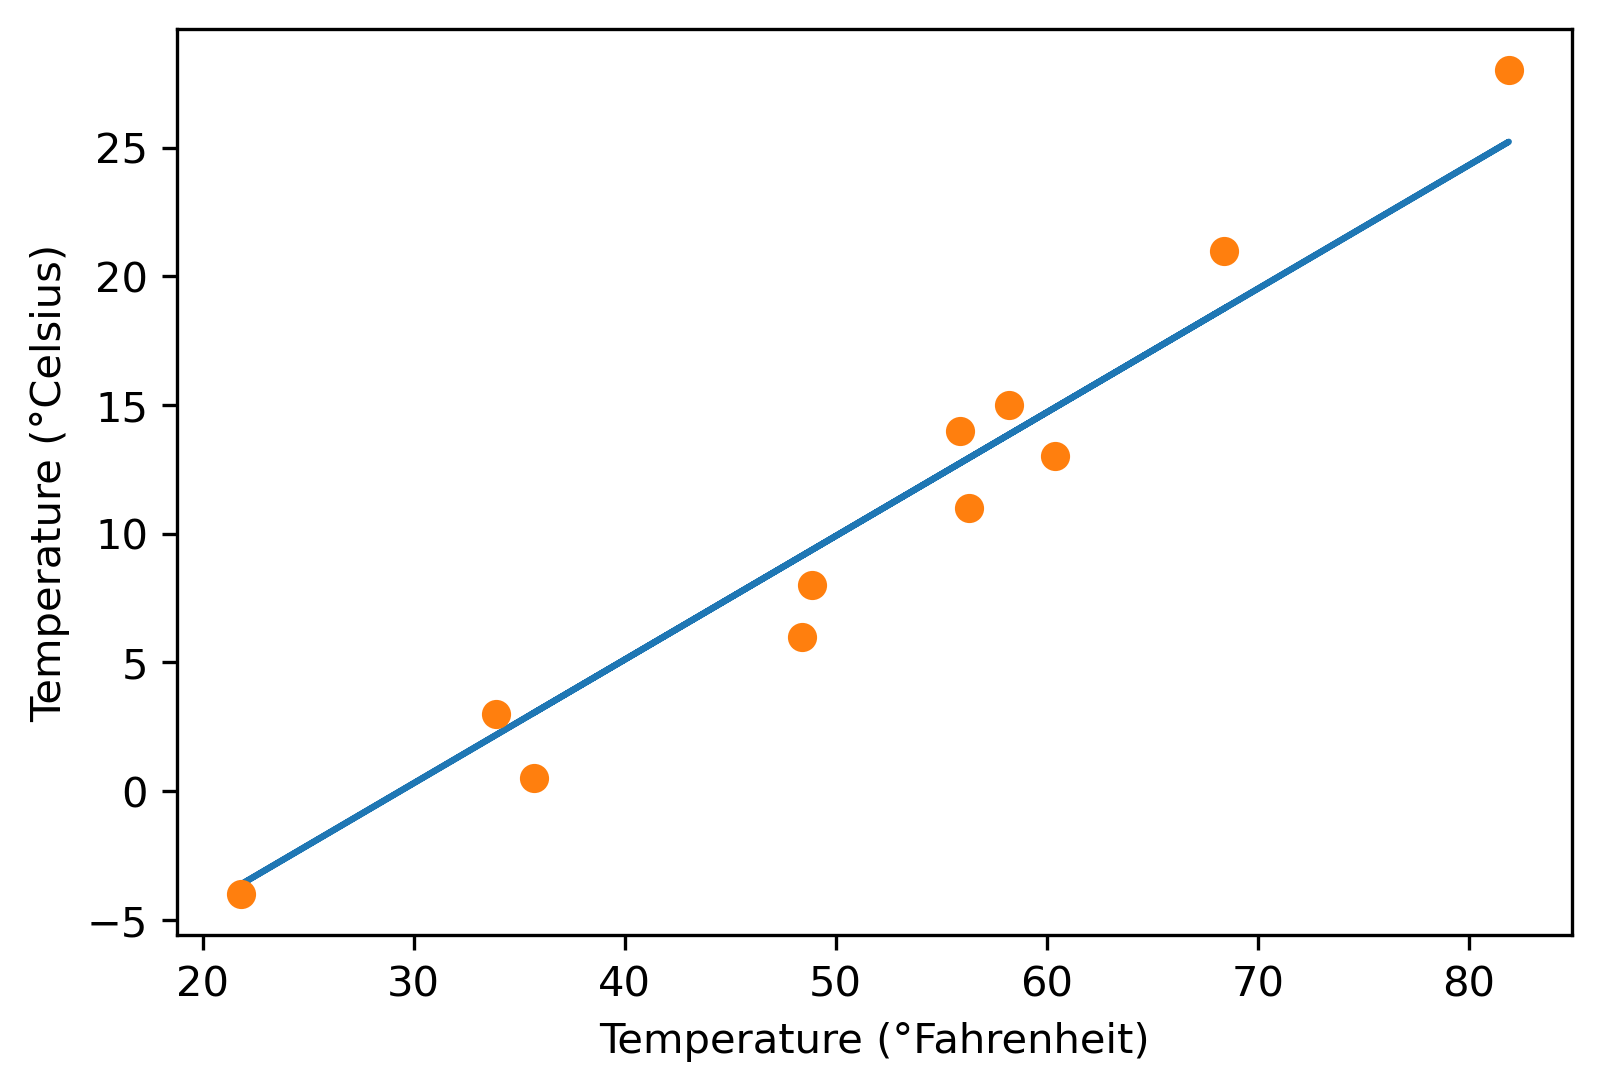

In [18]:

from matplotlib import pyplot as plt

t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

## 5.5 PyTorch's autograd

In [19]:

params = torch.tensor([1.0, 0.0], requires_grad=True)
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([4517.2969,   82.6000])

In [20]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 50 == 0:
            print('Epoch %d, Loss %f ' % (epoch, loss))
    return params

In [22]:
training_loop(
    n_epochs=1000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0], requires_grad=True),
    t_u=t_un,
    t_c=t_c
)

Epoch 50, Loss 25.710936 
Epoch 100, Loss 22.148710 
Epoch 150, Loss 19.143446 
Epoch 200, Loss 16.608065 
Epoch 250, Loss 14.469095 
Epoch 300, Loss 12.664560 
Epoch 350, Loss 11.142170 
Epoch 400, Loss 9.857802 
Epoch 450, Loss 8.774252 
Epoch 500, Loss 7.860116 
Epoch 550, Loss 7.088911 
Epoch 600, Loss 6.438284 
Epoch 650, Loss 5.889384 
Epoch 700, Loss 5.426310 
Epoch 750, Loss 5.035636 
Epoch 800, Loss 4.706046 
Epoch 850, Loss 4.427989 
Epoch 900, Loss 4.193405 
Epoch 950, Loss 3.995498 
Epoch 1000, Loss 3.828538 


tensor([  4.8021, -14.1031], requires_grad=True)

In [23]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [24]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step()
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [26]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([1.7761, 0.1064], requires_grad=True)

In [27]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 50 == 0:
            print("Epoch %d, Loss %f" % (epoch, loss))
    return params

In [29]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs=1000,
    optimizer=optimizer,
    params=params,
    t_u=t_un,
    t_c=t_c
)

Epoch 50, Loss 25.710936
Epoch 100, Loss 22.148710
Epoch 150, Loss 19.143446
Epoch 200, Loss 16.608065
Epoch 250, Loss 14.469095
Epoch 300, Loss 12.664560
Epoch 350, Loss 11.142170
Epoch 400, Loss 9.857802
Epoch 450, Loss 8.774252
Epoch 500, Loss 7.860116
Epoch 550, Loss 7.088911
Epoch 600, Loss 6.438284
Epoch 650, Loss 5.889384
Epoch 700, Loss 5.426310
Epoch 750, Loss 5.035636
Epoch 800, Loss 4.706046
Epoch 850, Loss 4.427989
Epoch 900, Loss 4.193405
Epoch 950, Loss 3.995498
Epoch 1000, Loss 3.828538


tensor([  4.8021, -14.1031], requires_grad=True)

In [31]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs=1000,
    optimizer=optimizer,
    params=params,
    t_u=t_un,
    t_c=t_c
)

Epoch 50, Loss 26.811684
Epoch 100, Loss 18.730587
Epoch 150, Loss 12.499732
Epoch 200, Loss 8.292546
Epoch 250, Loss 5.718660
Epoch 300, Loss 4.275753
Epoch 350, Loss 3.531972
Epoch 400, Loss 3.178962
Epoch 450, Loss 3.024571
Epoch 500, Loss 2.962301
Epoch 550, Loss 2.939128
Epoch 600, Loss 2.931168
Epoch 650, Loss 2.928646
Epoch 700, Loss 2.927909
Epoch 750, Loss 2.927709
Epoch 800, Loss 2.927660
Epoch 850, Loss 2.927647
Epoch 900, Loss 2.927646
Epoch 950, Loss 2.927646
Epoch 1000, Loss 2.927645


tensor([  5.3676, -17.3044], requires_grad=True)

In [32]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
valid_indices = shuffled_indices[-n_val:]

train_indices, valid_indices

(tensor([4, 9, 1, 7, 5, 8, 2, 3, 0]), tensor([10,  6]))

In [33]:
train_t_u = t_un[train_indices]
train_t_c = t_c[train_indices]

valid_t_u = t_un[valid_indices]
valid_t_c = t_c[valid_indices]

In [41]:
def training_loop(n_epochs, optimizer, params, train_t_u, train_t_c, valid_t_u, valid_t_c):
    for epoch in range(1, n_epochs+1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad():
            valid_t_p = model(valid_t_u, *params)
            valid_loss = loss_fn(valid_t_p, valid_t_c)
            assert valid_loss.requires_grad == False

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 100 == 0:
            print("Epoch {}, Train loss {:.4f}, Validation loss {:.4f}".format(epoch, train_loss, valid_loss))
    return params

In [40]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
    n_epochs=1000,
    optimizer=optimizer,
    params=params,
    train_t_u=train_t_u,
    train_t_c=train_t_c,
    valid_t_u=valid_t_u,
    valid_t_c=valid_t_c
)

Epoch 1, Train loss 75.9278, Validation loss 100.3288
Epoch 2, Train loss 37.4690, Validation loss 45.1741
Epoch 3, Train loss 31.4738, Validation loss 32.5256
Epoch 100, Train loss 22.8422, Validation loss 19.6996
Epoch 200, Train loss 17.1974, Validation loss 14.3780
Epoch 300, Train loss 13.1288, Validation loss 10.7367
Epoch 400, Train loss 10.1964, Validation loss 8.2772
Epoch 500, Train loss 8.0829, Validation loss 6.6445
Epoch 600, Train loss 6.5596, Validation loss 5.5866
Epoch 700, Train loss 5.4616, Validation loss 4.9250
Epoch 800, Train loss 4.6703, Validation loss 4.5339
Epoch 900, Train loss 4.0999, Validation loss 4.3247
Epoch 1000, Train loss 3.6888, Validation loss 4.2357


tensor([  4.7950, -14.4508], requires_grad=True)

In [46]:
def model(t_u, w1, w2, b):
    return w1 * (t_u ** 2) + w2 * t_u + b

params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs=1000,
    optimizer=optimizer,
    params=params,
    train_t_u=train_t_u,
    train_t_c=train_t_c,
    valid_t_u=valid_t_u,
    valid_t_c=valid_t_c
)

Epoch 1, Train loss 692.0137, Validation loss 602.8071
Epoch 2, Train loss 412.2429, Validation loss 340.6870
Epoch 3, Train loss 248.0133, Validation loss 190.8298
Epoch 100, Train loss 13.8983, Validation loss 9.1209
Epoch 200, Train loss 13.2232, Validation loss 8.6091
Epoch 300, Train loss 12.5930, Validation loss 8.1353
Epoch 400, Train loss 12.0048, Validation loss 7.6969
Epoch 500, Train loss 11.4556, Validation loss 7.2914
Epoch 600, Train loss 10.9429, Validation loss 6.9164
Epoch 700, Train loss 10.4644, Validation loss 6.5698
Epoch 800, Train loss 10.0176, Validation loss 6.2496
Epoch 900, Train loss 9.6005, Validation loss 5.9539
Epoch 1000, Train loss 9.2111, Validation loss 5.6810


tensor([ 0.3594,  0.2217, -0.3143], requires_grad=True)